<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotnine as gg
from plotnine import ggplot, aes 
import re
import os
from datetime import datetime, date, time, timezone, timedelta 

from collections import defaultdict
from functools import reduce 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sales_data_with_stores.csv',
 'mock_sales_data.csv',
 'groceries.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample-sales-data.csv',
 'scanner_data.csv',
 '1_order_payments_dataset.csv',
 'match_result_test.csv',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 '1_orders_dataset.csv',
 'sales.csv',
 'sales_vs_discount.csv',
 '1_customers_dataset.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'test.csv',
 'sample_data']

In [3]:
df = pd.read_csv('sales_vs_discount.csv')
df.head()

,date,product,sales_amount,discount
0,2021-04-02,1014,261.241,0.0
1,2021-04-03,1014,271.223,0.0
2,2021-04-04,1014,227.140,0.0
3,2021-04-05,1014,203.027,0.0
4,2021-04-06,1014,242.594,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          199 non-null    object 
 1   product       199 non-null    int64  
 2   sales_amount  199 non-null    float64
 3   discount      199 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.describe()

,product,sales_amount,discount
count,199.0,199.000000,199.000000
mean,1014.0,1100.443729,0.101841
std,0.0,1325.315538,0.156848
min,1014.0,128.086000,0.000000
25%,1014.0,201.706000,0.000000
50%,1014.0,376.981000,0.004098
75%,1014.0,1413.777001,0.253271
max,1014.0,5392.380002,0.379913


In [7]:
df['date'] = df['date'].to_numpy().astype('datetime64[D]')

In [28]:
labels = ['0.30', '0.25', '0.20', '0.15', '0.10', '0.05', '0.03', '0.02', '0.01', '0.005']
df = df.assign(range = df['discount'].apply(lambda x : np.select([x>=0.3, x>=0.25, x>=0.2, x>=0.15, x>=0.1, 
                                                                  x>=.05, x>=0.03, x>=0.02, x>=0.01,
                                                                  x>=.005], 
                                                                 labels, default = '0.0')))
df.head()

,date,product,sales_amount,discount,range
0,2021-04-02,1014,261.241,0.0,0.0
1,2021-04-03,1014,271.223,0.0,0.0
2,2021-04-04,1014,227.140,0.0,0.0
3,2021-04-05,1014,203.027,0.0,0.0
4,2021-04-06,1014,242.594,0.0,0.0


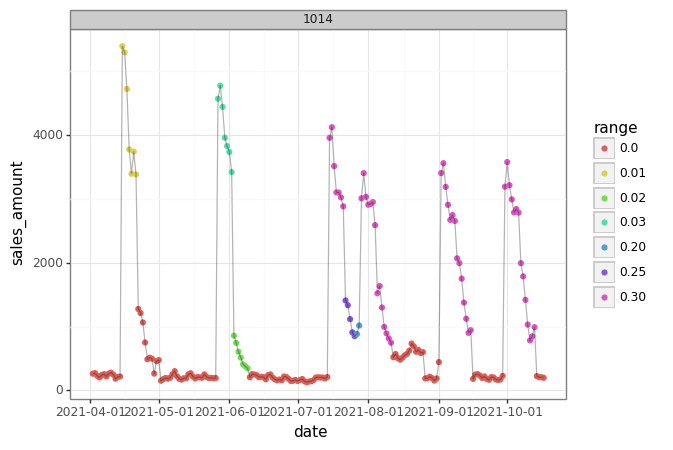

<ggplot: (8764950027261)>

In [29]:
(
    ggplot(df.assign(discount = df['discount'].astype(str))) +
    gg.geom_point(aes('date', 'sales_amount', color = 'range')) +
    gg.geom_line(aes('date', 'sales_amount', group = 1), alpha = .3) +
    gg.facet_wrap('~product') +
    gg.theme_bw()
)

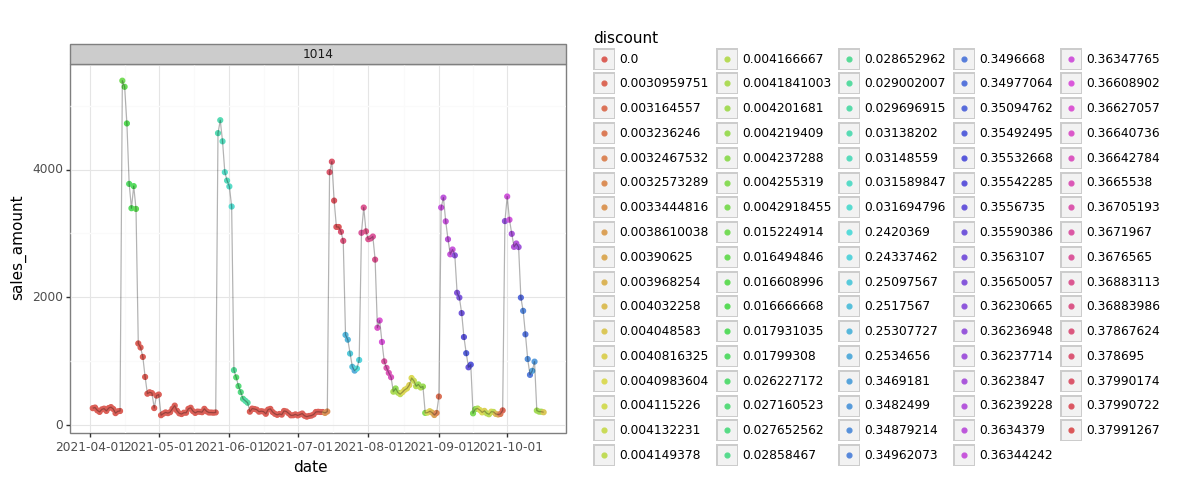

<ggplot: (8764949922533)>

In [31]:
(
    ggplot(df.assign(discount = df['discount'].astype(str))) +
    gg.geom_point(aes('date', 'sales_amount', color = 'discount')) +
    gg.geom_line(aes('date', 'sales_amount', group = 1), alpha = .3) +
    gg.facet_wrap('~product') +
    gg.theme_bw()
)

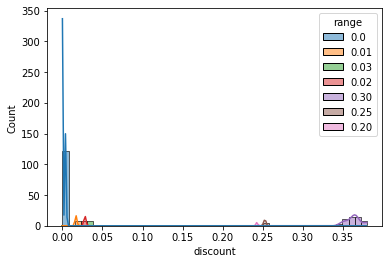

In [33]:
sns.histplot(data = df, x = 'discount', bins = 50, kde = True, hue = 'range')

# Iterator

In [34]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [38]:
{k: eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [40]:
reduce(lambda x, y : x + y['age'], users, 0)

227

In [41]:
reduce(lambda x, y : x + [y['age']], users, [])

[73, 29, 51, 32, 42]